In [82]:
import cv2
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn import neural_network
import numpy as np
import matplotlib.pyplot as plt

outputs=[]
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_COLOR)
        if filename[:6] =="normal":
            y=0
            outputs.append(y)
        else:
            y=1
            outputs.append(y)
        if img is not None:
            images.append(img)
    dataNames=['Without Sepia', 'Sepia']
    return images,outputs,dataNames



In [83]:

def load_labels(fileName):
    data = []
    dataNames = []
    with open(fileName) as file:
        for row in file:
            if row=='s\n':
                data.append(1)
                dataNames.append('Sepia')
            else:
                data.append(0)
                dataNames.append('Without Sepia')
    return data,list(set(dataNames))



In [84]:
# load the data

inputs,output,dataNames=load_images_from_folder('../input/sepia-filter/data_3')


In [85]:
# shuffle it so it doesn't have repetitive images of the same label 

def shuffle(inputs,output):
    indexes = [i for i in range(len(inputs))]
    choices = np.random.choice(indexes, len(indexes), replace = False)
    inputs=[inputs[i] for i in choices]
    output=[output[i] for i in choices]
    return inputs,output


In [90]:
#shuffle the data
inputs,output=shuffle(inputs,output)

#split the data
trainInput,trainOutput,testInput,testOutput=split_data(inputs,output)

print('Number of train samples: ')
print(np.array(trainInput).shape[0])
print('Number of test samples: ')
print(np.array(testInput).shape[0])

Number of train samples: 
544
Number of test samples: 
136


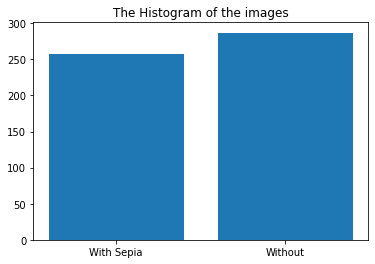

In [91]:
#plot the histogram
plt.hist(trainOutput,2,rwidth=0.8)
plt.title('The Histogram of the images')
# plt.xlabels('With Sepia','Without Sepia')

plt.xticks(np.arange(0.25, 1.25, step=0.5), ['With Sepia','Without'])
plt.show()

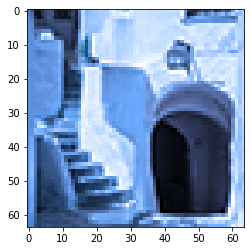

In [92]:
# normalise the data with OpenCV normaliser
# all the values in the image are between 0 and 1 

plt.imshow(trainInput[10])
for i in range(len(trainInput)):
    trainInput[i] = cv2.normalize(trainInput[i], None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
for j in range(len(testInput)):
    testInput[j] = cv2.normalize(testInput[j], None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)


In [93]:

testInput=np.array(testInput)
print(testInput.shape)
i=0
shapes_t={}
for x in testInput:
    i+=1
    if x.shape not in shapes_t.keys():
        shapes_t[x.shape]=1

trainInput=np.array(trainInput)

shapes_te={}
print(trainInput.shape)
i=0
for x in trainInput:
    i+=1
    if x.shape not in shapes_te.keys():
        shapes_te[x.shape]=1
        
print(shapes_t.keys())
print(shapes_te.keys())
        

(136, 64, 64, 3)
(544, 64, 64, 3)
dict_keys([(64, 64, 3)])
dict_keys([(64, 64, 3)])


Iteration 1, loss = 0.70682380
Iteration 2, loss = 0.67609635
Iteration 3, loss = 0.65172862
Iteration 4, loss = 0.62433899
Iteration 5, loss = 0.59284853
Iteration 6, loss = 0.56790045
Iteration 7, loss = 0.54024772
Iteration 8, loss = 0.51947551
Iteration 9, loss = 0.50026706
Iteration 10, loss = 0.48546022
Iteration 11, loss = 0.47221982
Iteration 12, loss = 0.46122045
Iteration 13, loss = 0.45180911
Iteration 14, loss = 0.44315953
Iteration 15, loss = 0.43725957
Iteration 16, loss = 0.42980961
Iteration 17, loss = 0.42454544
Iteration 18, loss = 0.41949695
Iteration 19, loss = 0.41495806
Iteration 20, loss = 0.41100978
Iteration 21, loss = 0.40756886
Iteration 22, loss = 0.40358746
Iteration 23, loss = 0.39994869
Iteration 24, loss = 0.39891103
Iteration 25, loss = 0.39454748
Iteration 26, loss = 0.39135271
Iteration 27, loss = 0.38850477
Iteration 28, loss = 0.38596307
Iteration 29, loss = 0.38318806
Iteration 30, loss = 0.38172512
Iteration 31, loss = 0.37914538
Iteration 32, los

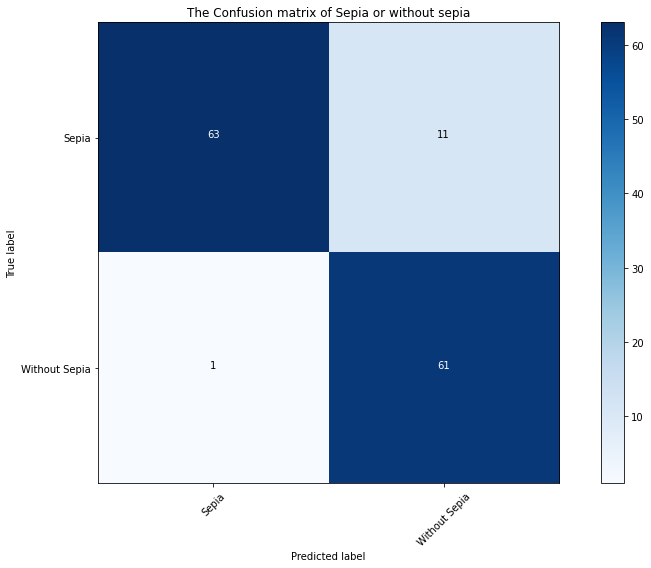

acc:  0.9117647058823529
prediction:  {'Sepia': 0.984375, 'Without Sepia': 0.8472222222222222}
recall:  {'Sepia': 0.8513513513513513, 'Without Sepia': 0.9838709677419355}


In [95]:
# make and train the classifier
# Nu pot folosi .fit() pentru ca imaginile au 4 dimensiuni
# deoarece ele iau in considerare si culoarea , deci fiecare element este o lista de Numpy array cu 3 dimensiuni , ultima fiind numarul de canale ( deoarece lucram cu imagini RGB acesta va fi 3)

reshape_int= trainInput.shape[1] *trainInput.shape[2]*trainInput.shape[3]

classifier=neural_network.MLPClassifier(hidden_layer_sizes=(64,27,2),activation='relu',max_iter=150,solver='sgd',verbose=1,random_state=1,learning_rate_init=0.001,shuffle=True)


X_flat=np.array(trainInput).reshape((trainInput.shape[0],reshape_int))

classifier.fit(X_flat,trainOutput)

reshape_test=testInput.shape[1] *testInput.shape[2]*testInput.shape[3]

X_flat_test=np.array(testInput).reshape((testInput.shape[0],reshape_test))

predicted_labels=classifier.predict(X_flat_test)

acc,prediction,recall,cm=evalMLP(testOutput,predicted_labels,label_names)
plot_confusion_matrix(cm,label_names,'Sepia or without sepia')

print('acc: ',acc)
print('prediction: ',prediction)
print('recall: ',recall)